# Create BBN with structure and data

If you know the BBN structure and have data, you can create a BBN using the structure and learn the parameters from the data. For now, the parameters are simply the raw counts (not-Bayesian). The method to use is from ``Factory.from_data()``.

In [1]:
import pandas as pd
from pybbn.graph.factory import Factory

df = pd.read_csv('./data/data-from-structure.csv')
structure = {
    'a': [],
    'b': ['a'],
    'c': ['b']
}

bbn = Factory.from_data(structure, df)

As usual, after you acquire a BBN, you can performe inference using an `InferenceController`.

In [2]:
from pybbn.pptc.inferencecontroller import InferenceController

join_tree = InferenceController.apply(bbn)

for node, posteriors in join_tree.get_posteriors().items():
    p = ', '.join([f'{val}={prob:.5f}' for val, prob in posteriors.items()])
    print(f'{node} : {p}')

b : off=0.55020, on=0.44980
c : off=0.57210, on=0.42790
a : off=0.49850, on=0.50150


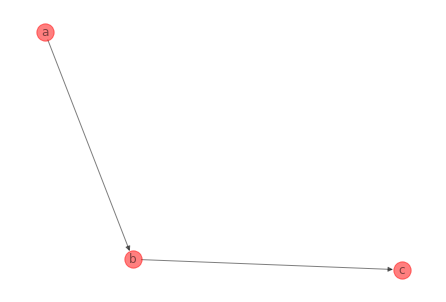

In [3]:
import networkx as nx

n, d = bbn.to_nx_graph()
nx.draw(n, with_labels=True, labels=d, node_color='r', alpha=0.5)